In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('twitter_archive_master.csv')
list(df)

['Unnamed: 0',
 'tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'breed_name',
 'stage',
 'retweet_count',
 'favorite_count',
 'reply_count']

In [3]:
df = df.drop('Unnamed: 0',1)
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed_name,stage,retweet_count,favorite_count,reply_count
0,666020888022790149,0,0,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,0,0,NaN,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,welsh_springer_spaniel,NaN,515.0,2562.0,25.0
1,666029285002620928,0,0,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,0,0,NaN,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,redbone,NaN,47.0,130.0,0.0
2,666033412701032449,0,0,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,0,0,NaN,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,german_shepherd,NaN,44.0,125.0,1.0
3,666044226329800704,0,0,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,0,0,NaN,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,rhodesian_ridgeback,NaN,141.0,299.0,1.0
4,666049248165822465,0,0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,0,0,NaN,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,miniature_pinscher,NaN,40.0,108.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 18 columns):
tweet_id                      2210 non-null int64
in_reply_to_status_id         2210 non-null int64
in_reply_to_user_id           2210 non-null int64
timestamp                     2210 non-null object
source                        2210 non-null object
text                          2210 non-null object
retweeted_status_id           2210 non-null int64
retweeted_status_user_id      2210 non-null int64
retweeted_status_timestamp    69 non-null object
expanded_urls                 2169 non-null object
rating_numerator              2210 non-null float64
rating_denominator            2210 non-null int64
name                          2210 non-null object
breed_name                    1512 non-null object
stage                         426 non-null object
retweet_count                 2200 non-null float64
favorite_count                2200 non-null float64
reply_count                   22

##### Let us correct the data type before going further with visualization

In [5]:
df.timestamp = pd.to_datetime(df.timestamp)
df.retweeted_status_timestamp = pd.to_datetime(df.retweeted_status_timestamp)
df.retweet_count = pd.to_numeric(df.retweet_count, errors='coerce').fillna(0).astype(np.int64)
df.favorite_count = pd.to_numeric(df.favorite_count, errors='coerce').fillna(0).astype(np.int64)
df.reply_count = pd.to_numeric(df.reply_count, errors='coerce').fillna(0).astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 18 columns):
tweet_id                      2210 non-null int64
in_reply_to_status_id         2210 non-null int64
in_reply_to_user_id           2210 non-null int64
timestamp                     2210 non-null datetime64[ns]
source                        2210 non-null object
text                          2210 non-null object
retweeted_status_id           2210 non-null int64
retweeted_status_user_id      2210 non-null int64
retweeted_status_timestamp    69 non-null datetime64[ns]
expanded_urls                 2169 non-null object
rating_numerator              2210 non-null float64
rating_denominator            2210 non-null int64
name                          2210 non-null object
breed_name                    1512 non-null object
stage                         426 non-null object
retweet_count                 2210 non-null int64
favorite_count                2210 non-null int64
reply_count         

In [6]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed_name,stage,retweet_count,favorite_count,reply_count
0,666020888022790149,0,0,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,0,0,NaT,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,welsh_springer_spaniel,NaN,515,2562,25
1,666029285002620928,0,0,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,0,0,NaT,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,redbone,NaN,47,130,0
2,666033412701032449,0,0,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,0,0,NaT,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,german_shepherd,NaN,44,125,1
3,666044226329800704,0,0,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,0,0,NaT,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,rhodesian_ridgeback,NaN,141,299,1
4,666049248165822465,0,0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,0,0,NaT,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,miniature_pinscher,NaN,40,108,7


##### Let us add two derived feature to our dataset: 
* num of days from the start of the weratedogs account (i.e number of day since 15th November 2015)
* normalized rating ; because at time he has changed the denominators


In [7]:
#for number of days
df['temp'] = df.timestamp - pd.datetime(2015,11,15)
df['num_days'] = df.temp.apply(lambda x: int(str(x).split('days')[0]))
df = df.drop('temp',1)

#for normalized rating
df['normalized_rating'] = round(df.rating_numerator / df.rating_denominator,2)

df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,breed_name,stage,retweet_count,favorite_count,reply_count,num_days,normalized_rating
0,666020888022790149,0,0,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,0,0,NaT,https://twitter.com/dog_rates/status/666020888...,8.0,10,None,welsh_springer_spaniel,NaN,515,2562,25,0,0.8
1,666029285002620928,0,0,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,0,0,NaT,https://twitter.com/dog_rates/status/666029285...,7.0,10,None,redbone,NaN,47,130,0,0,0.7
2,666033412701032449,0,0,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,0,0,NaT,https://twitter.com/dog_rates/status/666033412...,9.0,10,None,german_shepherd,NaN,44,125,1,0,0.9
3,666044226329800704,0,0,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,0,0,NaT,https://twitter.com/dog_rates/status/666044226...,6.0,10,None,rhodesian_ridgeback,NaN,141,299,1,1,0.6
4,666049248165822465,0,0,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,0,0,NaT,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,miniature_pinscher,NaN,40,108,7,1,0.5


In [8]:
print("Latest tweet we have is of", sorted(list(df.timestamp))[-1], "which almost an year old data but still below insights are based on the existing data")

Latest tweet we have is of 2017-08-01 16:23:56 which almost an year old data but still below insights are based on the existing data


# Insight 1: The Firsts

#### Here we will conver following:
* First rating
* first rating as 10
* first rating as 11
* first rating as 12
* first rating as 13
* first rating as 14
* from when <10 rating stopped
* highest rating and history
* lowest rating and history

In [9]:
print("First ever rating was on", df.iloc[0]['timestamp'], " with a rating", df.iloc[0]['rating_numerator'],"out of 10")
print("https://twitter.com/dog_rates/status/"+str(df.iloc[0]['tweet_id']))

df_trend = df[df.rating_numerator == 10]
print()
print("First ever 10/10 rating was on", df_trend.iloc[0]['timestamp'], "when weratedogs twitter account was", df_trend.iloc[0]['num_days'],"days old")
print("https://twitter.com/dog_rates/status/"+str(df_trend.iloc[0]['tweet_id']))

df_trend = df[df.rating_numerator == 11]
print()
print("First ever 11/10 rating was on", df_trend.iloc[0]['timestamp'], "when weratedogs twitter account was", df_trend.iloc[0]['num_days'],"days old")
print("https://twitter.com/dog_rates/status/"+str(df_trend.iloc[0]['tweet_id']))

df_trend = df[df.rating_numerator == 12]
print()
print("First ever 12/10 rating was on", df_trend.iloc[0]['timestamp'], "when weratedogs twitter account was", df_trend.iloc[0]['num_days'],"days old")
print("https://twitter.com/dog_rates/status/"+str(df_trend.iloc[0]['tweet_id']))

df_trend = df[df.rating_numerator == 13]
print()
print("First ever 13/10 rating was on", df_trend.iloc[0]['timestamp'], "when weratedogs twitter account was", df_trend.iloc[0]['num_days'],"days old")
print("https://twitter.com/dog_rates/status/"+str(df_trend.iloc[0]['tweet_id']))

df_trend = df[df.rating_numerator == 14]
print()
print("First ever 14/10 rating was on", df_trend.iloc[0]['timestamp'], "when weratedogs twitter account was", df_trend.iloc[0]['num_days'],"days old")
print("https://twitter.com/dog_rates/status/"+str(df_trend.iloc[0]['tweet_id']))

First ever rating was on 2015-11-15 22:32:08  with a rating 8.0 out of 10
https://twitter.com/dog_rates/status/666020888022790149

First ever 10/10 rating was on 2015-11-16 00:30:50 when weratedogs twitter account was 1 days old
https://twitter.com/dog_rates/status/666050758794694657

First ever 11/10 rating was on 2015-11-16 03:55:04 when weratedogs twitter account was 1 days old
https://twitter.com/dog_rates/status/666102155909144576

First ever 12/10 rating was on 2015-11-17 01:02:40 when weratedogs twitter account was 2 days old
https://twitter.com/dog_rates/status/666421158376562688

First ever 13/10 rating was on 2015-11-22 02:34:57 when weratedogs twitter account was 7 days old
https://twitter.com/dog_rates/status/668256321989451776

First ever 14/10 rating was on 2016-01-08 19:45:39 when weratedogs twitter account was 54 days old
https://twitter.com/dog_rates/status/685547936038666240


In [10]:
df_trend = df[df.num_days > 565]
print("Number of ratings below 10/10 after to",df_trend.iloc[0]['timestamp'], "were", df_trend[df_trend.rating_numerator < 11].shape[0])
print('i.e. After',round((df_trend.iloc[0].num_days)/365,1),"years, weratedogs completly shifted their focus on dogs which are of worth greater than 10/10.")

Number of ratings below 10/10 after to 2017-06-03 00:48:22 were 0
i.e. After 1.6 years, weratedogs completly shifted their focus on dogs which are of worth greater than 10/10.


##### weratedogs had clear idea of when to use greater than 15/10 from the day two of the account timeline. 

##### There are greater than 15/10 ratings but they just logically(& numerically ) relates to the dog picture and occassion.

In [11]:
r_gt_15_list = list(df[df.normalized_rating > 1.5].tweet_id)

print("https://twitter.com/dog_rates/status/"+str(r_gt_15_list[0]), " : for snoop dogg 420 song")
print("https://twitter.com/dog_rates/status/"+str(r_gt_15_list[1]), " : for year of American Independence Day")
print("https://twitter.com/dog_rates/status/"+str(r_gt_15_list[2]), " : to indicate 24x7")
print("https://twitter.com/dog_rates/status/"+str(r_gt_15_list[3]), " : to indicate the rock band *blink-182*")
print("https://twitter.com/dog_rates/status/"+str(r_gt_15_list[4]), " : to indicate japanese comic character *666 Satan*")


https://twitter.com/dog_rates/status/670842764863651840  : for snoop dogg 420 song
https://twitter.com/dog_rates/status/749981277374128128  : for year of American Independence Day
https://twitter.com/dog_rates/status/810984652412424192  : to indicate 24x7
https://twitter.com/dog_rates/status/838150277551247360  : to indicate the rock band *blink-182*
https://twitter.com/dog_rates/status/855860136149123072  : to indicate japanese comic character *666 Satan*


In [12]:
df_trend = df[df.rating_numerator == df.rating_numerator.max()]
print("Highest ever rating was",df_trend.iloc[0]['rating_numerator'] ,"given on", df_trend.iloc[0]['timestamp'])
print("https://twitter.com/dog_rates/status/"+str(df_trend.iloc[0]['tweet_id']))

Highest ever rating was 1776.0 given on 2016-07-04 15:00:45
https://twitter.com/dog_rates/status/749981277374128128


##### Highest rating ever given was on 4th of July (America Independence Day) and the rating was 1776 which is the year of declaration of independence.

##### Lowest rating of 0/10 were given in 2 cases:
* when there was no image of the dog in the image. 

In [13]:
df_trend = df[df.rating_numerator == df.rating_numerator.min()]
print("https://twitter.com/dog_rates/status/"+str(list(df_trend['tweet_id'])[0]))

https://twitter.com/dog_rates/status/746906459439529985


* when other account re used the caption given for a dog by weratedogs

In [14]:
print("https://twitter.com/dog_rates/status/"+str(list(df_trend['tweet_id'])[1]))

https://twitter.com/dog_rates/status/835152434251116546


# Insight 2: Serendipity Rating

#### weratedogs have standardized over period of time their ratings to be strictly above 10/10 and below 15/10. The team/CEO clearly mentioned in one of the tweet that 10/10 is reserved for all good dogs. Serendipity Rating is beyond 15 ; just to match the emotional attachment with dog expressed over the tweet text. However, in those cases denominator is not 10 :). Hence, the normalized rating is still less than 1.5.

##### Here we see that for almost every 50 days , he gave a strange number. As can see in the below plot, it was really quite often in the early days. This should have caught him lot of attention/followers.

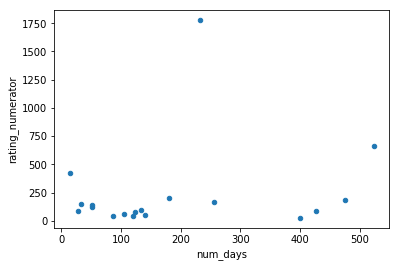

In [15]:
df_trend = df[df.rating_numerator > 15]
df_trend.plot.scatter(x='num_days', y='rating_numerator')

##### Let us look at the same with normalized values. For every 150 days he gave atleast one rating of numerically logical rating (as explained in the end of last insight).

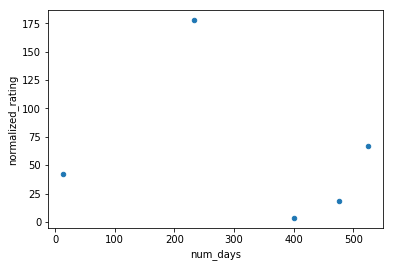

In [16]:
df_trend = df[df.normalized_rating > 1.5]
df_trend.plot.scatter(x='num_days', y='normalized_rating')

# Insight 3: Rating Patterns

#### We will try to answer some the crucial questions like:
* what is rating patterns over the years ?
* did people liking vary based on his rating ?
* why were less than 10/10 were given ? can we understand all the cases (may be not)?
* what it takes to get 15/10 ? (low samples for 15/10 and hence my study on tweet in the timeline assessed are documented)


##### Let us see rating pattern over years

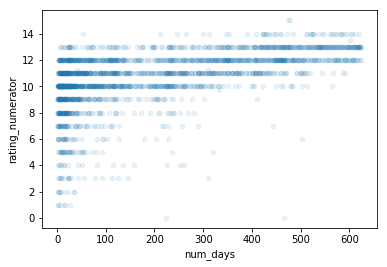

In [17]:
#let us ignore the serendipity and numero - logical rating. & we dont have correct 15/10 data
df_trend = df[df.rating_numerator < 16]
df_trend.plot.scatter(x='num_days', y='rating_numerator',alpha= 0.09)

##### There is clear indication of how lower rating started declining and higher ratings like  13 & 14 units (out of 10) gained more popularity recently. After all, it is a pet show who wants to know about the one with lower rating ?

##### Rating 12/10 seems to be a steady value during all these times.

##### Did people like his rating ?

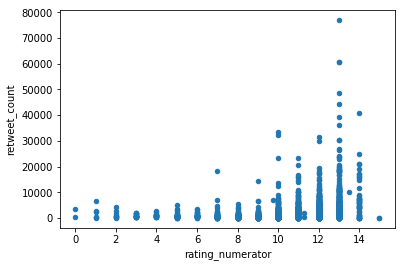

In [18]:
df_trend = df[df.rating_numerator < 16]
df_trend.plot.scatter(x='rating_numerator', y='retweet_count')

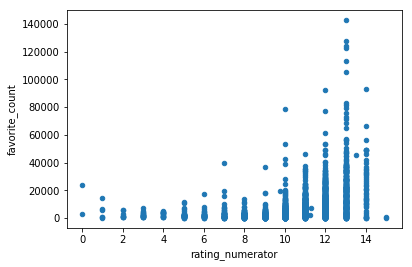

In [19]:
df_trend.plot.scatter(x='rating_numerator', y='favorite_count')

##### is there any relation between retweet and favorite?

Correlation between retween and favorite count :  0.920439143768


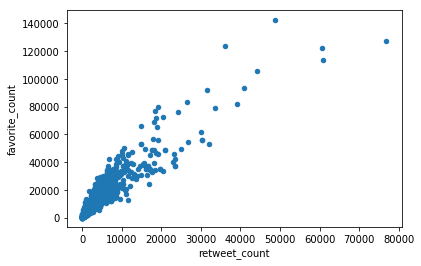

In [20]:
print("Correlation between retween and favorite count : ",df.retweet_count.corr(df.favorite_count))
df_trend.plot.scatter(x='retweet_count', y='favorite_count')

##### Yes, I guess people always like it first before retweeting. So if there is a pattern for one then it would fit for other too.

##### So would reply count come to rescue here ?

Correlation between favorite and reply count : 0.70095222289


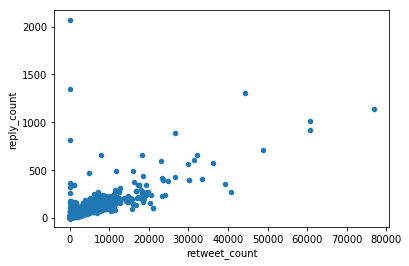

In [21]:
print("Correlation between favorite and reply count :", df.favorite_count.corr(df.reply_count))
df.plot.scatter(x='retweet_count',y='reply_count')

Correlation between favorite and reply count : 0.70095222289


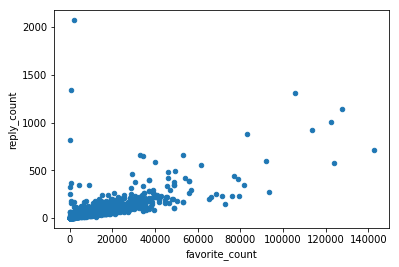

In [22]:
print("Correlation between favorite and reply count :", df.favorite_count.corr(df.reply_count))
df.plot.scatter(x='favorite_count',y='reply_count')

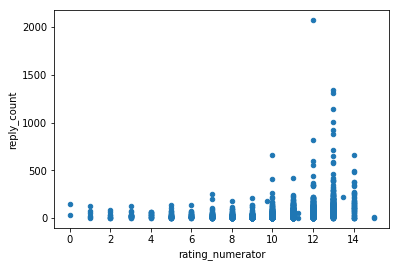

In [23]:
df_trend.plot.scatter(x='rating_numerator', y='reply_count')

##### The two independent variable (retweet count and reply count) confirms that people also liked higher rating !!!!

##### Let us see why he gave < 10

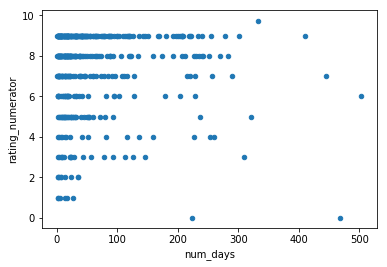

In [24]:
df_trend = df[df.rating_numerator <10]
df_trend.plot.scatter(x='num_days', y='rating_numerator')


##### The above chart confirms our earlier observations of only two 0/10 ratings and weratedogs moving away from less than 10/10 ratings at around 550 days.

##### Let us see couple of those tweets

In [25]:
df_rating_trend_m = df[df.rating_numerator <10]
#we should exclude day 1
df_rating_trend_m = df_rating_trend_m[df_rating_trend_m.num_days >0]
df_rating_trend_m[['tweet_id','breed_name','stage']]

print("Total number of ratings < 10 : ", df_rating_trend_m.shape[0])
print("How many of those were dogs?\nAns: ", df_rating_trend_m[~df_rating_trend_m.breed_name.isnull()].shape[0])
df_images_70 = pd.read_csv('twitter_archive_cleaned_images.csv')
df_rating_trend_m = df_rating_trend_m.merge(df_images_70[['tweet_id','breed_name']],how='left',on='tweet_id')
print("How many of those dogs were predicted with greater than 70% confidence?\nAns: ", df_rating_trend_m[~df_rating_trend_m.breed_name_y.isnull()].shape[0])

Total number of ratings < 10 :  424
How many of those were dogs?
Ans:  225
How many of those dogs were predicted with greater than 70% confidence?
Ans:  68


##### When I investigated couple of tweets less than 10/10, I found following observations:

* either they were not dogs or full image of the dog was not there. 
    * https://twitter.com/dog_rates/status/668981893510119424 : is a photo of Fish.
    * https://twitter.com/dog_rates/status/666293911632134144 : not a dog.
    * https://twitter.com/dog_rates/status/848212111729840128 : it is a lamb.
    * https://twitter.com/dog_rates/status/666817836334096384 : only head of the dog present.
    
* Either dog was not in a fun mood or the picture had other animals 
    * https://twitter.com/dog_rates/status/814578408554463233 : has pig in the pic.
    * https://twitter.com/dog_rates/status/666407126856765440 : dead ducks along with it might have lead to low rating.
    
* pic itself was not good quality
    * https://twitter.com/dog_rates/status/740711788199743490 : not a clean pic to rate.
    * https://twitter.com/dog_rates/status/666804364988780544 : focus was not set to dog.
    
* error in rating parser
    * https://twitter.com/dog_rates/status/667878741721415682 : rated as 10&2 out of 10 (12/10)
    
* lower rating was given with lighter note:
    * https://twitter.com/dog_rates/status/781661882474196992 : dog dress matches the road.
    
* couple of rating pattern made me think that if the dogs are out in the wild or in nature playing happily would get better rating
    * https://twitter.com/dog_rates/status/666776908487630848
    * https://twitter.com/dog_rates/status/666044226329800704
    * https://twitter.com/dog_rates/status/666058600524156928
    * https://twitter.com/dog_rates/status/750383411068534784
    

##### What it takes to get better rating?

In [26]:
df3 = df[['source','tweet_id']].groupby(['source']).count().reset_index()
df4 = df[['source','rating_numerator']].groupby(['source']).median().reset_index()
df6 = df[['source','retweet_count']].groupby(['source']).median().reset_index()
df7 = df[['source','reply_count']].groupby(['source']).median().reset_index()
df8 = df[['source','favorite_count']].groupby(['source']).median().reset_index()
df5 = df3.merge(df4)
df5 = df5.merge(df6)
df5 = df5.merge(df7)
df5 = df5.merge(df8)

df5.columns = [['source', 'tweet_id_count', 'median_rating_numerator','median_retweet_count','median_reply_count','median_favorite_count']]
df5

,source,tweet_id_count,median_rating_numerator,median_retweet_count,median_reply_count,median_favorite_count
0,TweetDeck,11,11.0,978,21,3409
1,Twitter Web Client,33,11.0,330,8,839
2,Twitter for iPhone,2075,11.0,1301,31,4074
3,Vine - Make a Scene,91,12.0,1821,48,4267


In [27]:
print('Highest retweeted weratedogs tweet :','https://twitter.com/dog_rates/status/'+ str(df[df.retweet_count == df.retweet_count.max()].iloc[0]['tweet_id']))

Highest retweeted weratedogs tweet : https://twitter.com/dog_rates/status/744234799360020481


##### Vine allows you to make 6 secods videos (6.5 seconds with Vine Camera). Easily goes viral if it is funny :)

#### Which dogs are rated 15/10 ? 
##### Recently "15/10 Moments" has started in weratedogs; where the 15/10 ratings are listed. It is dedicated to all brave and bold dogs which have fought against disabilities or helped others by act of kindness or helped other dog rescue or fought against disease. May God bless those Dogs !!!

##### As per rating analysis (as discussed in the previous Insight), he needs to move up in the rating system over period of time. It is a good move to select the criteria for 15/10. According to me, weratedogs would circulate 12, 13, 14 around funny comments to engage 7 million followers but dedicate 15/10 as a true respect the dog lovers.